# Training Set Creation

Operation carried out in this notebook:


1.   **Data Augmentation:** in order to generate a training/validation set and a testset for our model;
2.   **Pre-Processing:** perform standard operations on our text samples in
order to make them more amendable for the model;





In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive') #mount my private Google Drive on Colab environment

Mounted at /content/drive


In [ ]:
#Inspect Drive folder for dataset files

import os #library for system-dependent functionalities
import pandas as pd #dataframe operations and analysis

# Input: string dir
#        string filename
# Output: creates and returns a pandas dataframe "data" from the dir/filename.csv file and displays its structure
def load_dataframe_and_print_info(dir, filename):
    file_path=os.path.join(dir, filename)
    data=pd.read_csv(file_path) #loads the CSV file into a pandas dataframe
    print('Dataset', filename)
    data.info()
    print('\n')
    return data

In [ ]:
print('Available data:')
working_dir='/content/drive/MyDrive/DL/Project' #project's home directory
filenames=[] #list of relevant files
for f in os.listdir(working_dir): #inspect folder's content
    if f[-4:]=='.csv': #datasets are stored in the .csv format
      print('-', f)
      filenames.append(f)
print('\n')

train_essays_raw=load_dataframe_and_print_info(working_dir, filenames[0]) #load text samples provided by Kaggle in a pandas dataframe
train_prompts_raw=load_dataframe_and_print_info(working_dir, filenames[2]) #load prompts used for generating the text samples in a pandas dataframe

Available data:
- train_essays.csv
- test_essays.csv
- train_prompts.csv
- sample_submission.csv


Dataset train_essays.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


Dataset train_prompts.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes




Kaggle's dataset consists of 1378 text samples.

Text samples are stored as strings.

Each sample is associated with two integer labels:


1.   A label 'generated' indicating wheter the text is human-written (0) or AI-generated (1);
2.   A label 'prompt_id" indicating wheter the prompt for generating the text;

Each sample is also associated a string label 'source', indicating the origin for the text (either a corpus for the human-written texts or a LLM generative model for AI-generated texts). All samples provided by Kaggle have been marked with the label "Kaggle" as source.

Each prompt is coded with an integer label:


1.   **0:** "Car-free cities";
2.   **1:** "Does the electoral college work?";



In [ ]:
#Inspect training samples

# Input: int row
#        dataframe dataset
#        string name
# Output: it extracts the entry of index "row" from the dataframe "dataset" (called "name") and displays its features
def print_training_sample(row, dataset, name):
    print('Training sample from', name)
    sample=dataset.iloc[row] #extract the sample at the specified row index
    print(sample)
    print('\n')
    print('Text type:', type(sample[0]))
    print('Text length (characters)=', len(sample[0]))
    print('Text length (words)=', len(sample[0].split()))
    print('Label type:', type(sample[1]))
    print('\n')

In [ ]:
training_set=train_essays_raw.drop(columns=['id']) #create new dataframe for text samples
columns_reordered=['text', 'generated', 'prompt_id'] #define the new order of columns
training_set=training_set.reindex(columns=columns_reordered) #reorder the columns in 'training_set' according to the specified order
training_set['source']='Kaggle' #add a column 'source' to the dataframe

#Inspecting training prompts
prompts_set=train_prompts_raw.drop(columns=['instructions', 'source_text']) #create new dataframe for prompts
print('Prompt 0:', prompts_set.iloc[0][1])
print('Prompt 1:', prompts_set.iloc[1][1])
print('\n')

print_training_sample(0, training_set, 'train_essays.csv')
pd.set_option('display.max_colwidth', 1)
training_set

Prompt 0: Car-free cities
Prompt 1: Does the electoral college work?


Training sample from train_essays.csv
text         Cars. Cars have been around since they became ...
generated                                                    0
prompt_id                                                    0
source                                                  Kaggle
Name: 0, dtype: object


Text type: <class 'str'>
Text length (characters)= 3289
Text length (words)= 584
Label type: <class 'numpy.int64'>




text  \
0     Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "Paris bans driving due to smog," by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.\n\nLikewise, in the article, "Carfree day is spinning into a big hit in Bogota," by Andrew Selsky says, how programs that's set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs for a long time, traffic jams have gone down, and restaurants and shopping districts have popped up, all due to the fact of having less cars around.\n\nIn conclusion, the use of less cars and having carfree days, have had a big impact on the environment of cities because, it is cutting down the air pollution that the cars have majorly polluted, it has aloud countries like Columbia to repair sidewalks, and cut down traffic jams. Limiting the use of cars would be a good thing for America. So we should limit the use of cars by maybe riding a bike, or maybe walking somewhere that isn't that far from you and doesn't need the use of a car to get you there. To me, limiting the use of cars might be a good thing to do.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# Data Augmentation
The samples provided by Kaggle are not enough to properly train and test our model.

We download some DAIGT datasets ("Detection of AI-Generated Texts") from Kaggle platform and we use them to assemble bigger datasets.

In [ ]:
#Load extra data
filenames2=[]
data_dir=os.path.join(working_dir, 'DAIGT_datasets') #directory of DAIGT datasets
for f in os.listdir(data_dir): #inspect folder's content
    if f[-4:]=='.csv': #dataset are stored in the .csv format
      print('-', f)
      filenames2.append(f)

print('\n')

extra=[] #array of pandas dataframes containing the DAIGT datasets downloaded from Kaggle
for i in range(len(filenames2)):
   extra.append(load_dataframe_and_print_info(data_dir, filenames2[i]))

- train_v3_drcat_01.csv
- train_v3_drcat_02.csv
- train_v4_drcat_01.csv
- daigt_magic_generations.csv


Dataset train_v3_drcat_01.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65508 entries, 0 to 65507
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           65360 non-null  object
 1   label          65508 non-null  int64 
 2   prompt_name    65508 non-null  object
 3   source         65508 non-null  object
 4   RDizzl3_seven  65508 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.1+ MB


Dataset train_v3_drcat_02.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65267 entries, 0 to 65266
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           65267 non-null  object
 1   label          65267 non-null  int64 
 2   prompt_name    65267 non-null  object
 3   source         65267 non-null  object


Creating training and validation set.

**Strategy 1:** we assemble a dataset for training and validation by adding to the Kaggle's dataset new text samples from the following datasets:


1.  train_v3_drcat_01.csv;
2.   train_v3_drcat_02.csv;
3.   train_v4_drcat_01.csv;
4.   daigt_magic_generations.csv;

We select only samples generated with the same two prompts of the original Kaggle dataset. We make sure that no duplicate texts nor empty texts are present in the final dataset.



In [ ]:
# #Create complete dataset

# # Input: dataframe training_set
# #        dataframe extention_set
# #        string prompt_1
# #        string prompt_2
# # Output: it returns the dataframe "training_set" extended with entries from the dataset "extension_set", only if such entries have either "prompt_1" or "prompt_2"
# #         as values of the the column "prompt_name"
# def extend_training_set(training_set, extension_set, prompt_1, prompt_2):
#     for index, row in extension_set.iterrows():
#         if row['prompt_name'] in [prompt_1, prompt_2] and row['text'] not in training_set['text'].values and pd.notna(row['text']):
#             if row['prompt_name']==prompt_1:
#                 prompt=0
#             else:
#                 prompt=1
#             values={'text': row['text'], 'generated': row['label'], 'prompt_id': prompt, 'source': row['source']}
#             new_entry=pd.DataFrame([values], columns=['text', 'generated', 'prompt_id', 'source']) #create new entry
#             training_set=pd.concat([training_set, new_entry], ignore_index=True) #add new entry to the training set
#     return training_set

In [ ]:
# for i in range(len(extra)-1):
#     training_set=extend_training_set(training_set, extra[i], prompts_set.iloc[0][1], prompts_set.iloc[1][1])

# training_set.info()
# pd.set_option('display.max_colwidth', 1)
# training_set

**Strategy 2:** we assemble a dataset for training and validation by adding to the Kaggle's dataset new text samples from the dataset "train_v4_drcat_01.csv".

We make sure that no duplicate texts nor empty texts are present in the final dataset, but we make no filtering related to prompts (so, the final dataset will also have samples generated with prompts different from the two prompts of the original Kaggle dataset).

In [ ]:
#Create complete dataset

# Input: dataframe training_set
#        dataframe extention_set
#        list<string> prompts_list
#        string prompt_1
#        string prompt_2
# Output: it returns the dataframe "training_set" extended with entries from the dataset "extension_set"
def extend_training_set(training_set, extension_set, prompts_list):
    for index, row in extension_set.iterrows():
        if pd.notna(row['text']) and row['text'] not in training_set['text'].values: #check for void samples or already present samples
            prompt=prompts_list.index(row['prompt_name']) #fetch code related to sample's prompt
            values={'text': row['text'], 'generated': row['label'], 'prompt_id': prompt, 'source': row['source']}
            new_entry=pd.DataFrame([values], columns=['text', 'generated', 'prompt_id', 'source']) #create new entry related to the sample
            training_set=pd.concat([training_set, new_entry], ignore_index=True) #add new entry to the dataframe
    return training_set

In [ ]:
prompt_names=extra[2]['prompt_name'].unique().tolist() #creates prompts list

#assigns prompt 'Does the electoral college work?' index 1 in the list
if prompts_set.iloc[1][1] in prompt_names:
    prompt_names.remove(prompts_set.iloc[1][1])
prompt_names.insert(0, prompts_set.iloc[1][1])

#assigns prompt 'Car-free cities' index 0 in the list
if prompts_set.iloc[0][1] in prompt_names:
    prompt_names.remove(prompts_set.iloc[0][1])
prompt_names.insert(0, prompts_set.iloc[0][1])

In [ ]:
training_set=extend_training_set(training_set, extra[2], prompt_names) #create training set

training_set.info()
pd.set_option('display.max_colwidth', 1)
training_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73573 entries, 0 to 73572
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       73573 non-null  object
 1   generated  73573 non-null  int64 
 2   prompt_id  73573 non-null  int64 
 3   source     73573 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


text  \
0      Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "Paris bans driving due to smog," by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.\n\nLikewise, in the article, "Carfree day is spinning into a big hit in Bogota," by Andrew Selsky says, how programs that's set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs for a long time, traffic jams have gone down, and restaurants and shopping districts have popped up, all due to the fact of having less cars around.\n\nIn conclusion, the use of less cars and having carfree days, have had a big impact on the environment of cities because, it is cutting down the air pollution that the cars have majorly polluted, it has aloud countries like Columbia to repair sidewalks, and cut down traffic jams. Limiting the use of cars would be a good thing for America. So we should limit the use of cars by maybe riding a bike, or maybe walking somewhere that isn't that far from you and doesn't need the use of a car to get you there. To me, limiting the use of cars might be a good thing to do.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
#Extend prompts set with new prompts
for i in range(2, len(prompt_names)): #explore prompts lists from the third position (first two prompts already present in the prompts set)
    values={'prompt_id': i, 'prompt_name': prompt_names[i]} #assign integer index (from 0 to 14) to the prompt
    new_entry=pd.DataFrame([values], columns=['prompt_id', 'prompt_name']) #create new entry related to the prompt
    prompts_set=pd.concat([prompts_set, new_entry], ignore_index=True) #add entry to the dataframe

prompts_set.info()
prompts_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prompt_id    15 non-null     int64 
 1   prompt_name  15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


,prompt_id,prompt_name
0,0,Car-free cities
1,1,Does the electoral college work?
2,2,Phones and driving
3,3,Summer projects
4,4,"""A Cowboy Who Rode the Waves"""
5,5,Mandatory extracurricular activities
6,6,Exploring Venus
7,7,Facial action coding system
8,8,The Face on Mars
9,9,Community service


We will now display some statistics related to the generated dataset for training and validation.

In [ ]:
#Labels and prompts stats for the final training_set

import matplotlib.pyplot as plt #plots and graphs (MATLAB-like interface)

# Input: axes ax
#        string feature
#        series count
#        string set_name
#        list<string> xValues
# Output: given a pandas series "count" (computed over the column "feature" of the dataset called "set_name"), it plots it in the bar chart "ax"
#         the horizontal axis is labelled with the list "xValues" with rotation "verse"
def bar_plot(ax, feature, count, set_name, xValues, verse):
   ax.bar(xValues, count, color='skyblue') #bar plot
   ax.set_title(set_name)
   ax.set_xlabel(feature)
   ax.set_ylabel('Count')
   ticks=range(len(count))
   ax.set_xticks(ticks, xValues, rotation=verse) #values on the X axis

   for j, v in enumerate(count): #values on the Y axis
       ax.text(j, v + 15, str(v), ha='center')

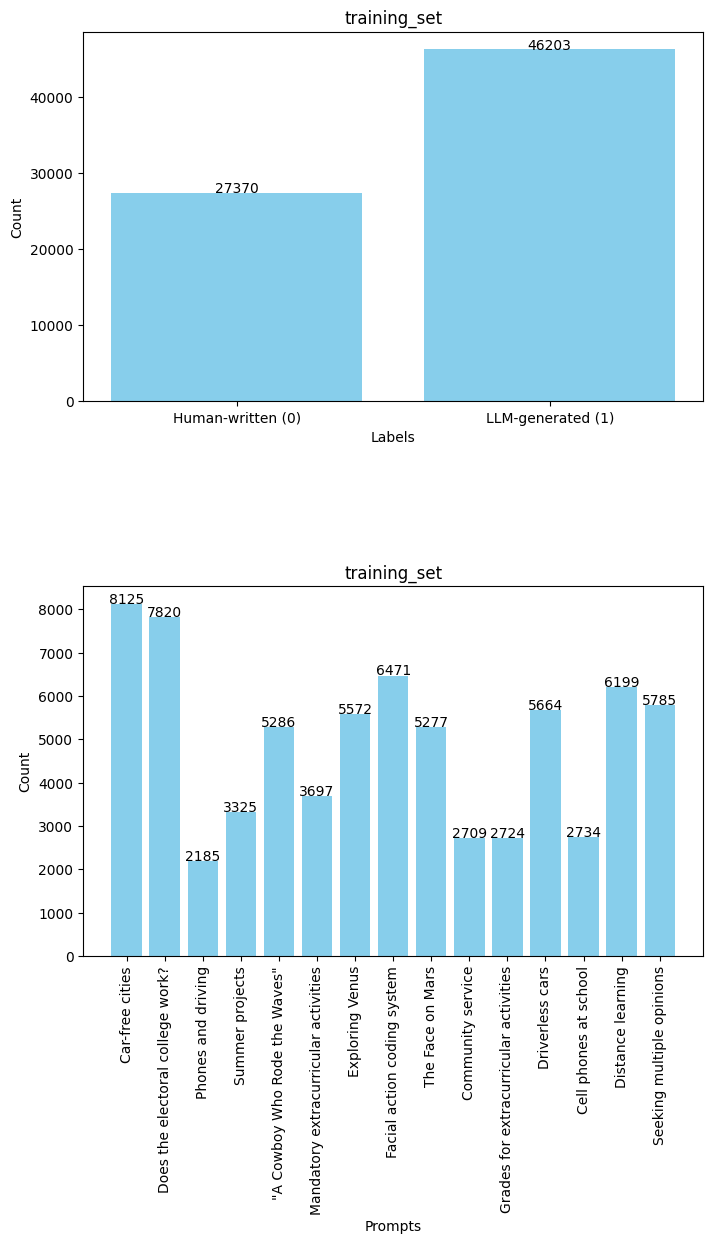

In [ ]:
fig, axs=plt.subplots(2, 1, figsize=(8, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

label_count=training_set["generated"].value_counts().sort_index() #create series over the column "generated" of the dataframe
labels=['Human-written (0)', 'LLM-generated (1)']
prompt_count=training_set["prompt_id"].value_counts().sort_index()
#prompt_names=[prompts_set.iloc[0][1], prompts_set.iloc[1][1]] #prompts lists if there are only two prompts

ax=axs.flatten()[0]
bar_plot(ax, 'Labels', label_count, 'training_set', labels, 0)

ax=axs.flatten()[1]
bar_plot(ax, 'Prompts', prompt_count, 'training_set', prompt_names, 'vertical')

In [ ]:
#Sources of training samples (corpus of human written texts, LLM models for AI-generated texts)

# Input: dataframe dataset
#        string set_name
#        string field
# Output: given the column "field" of the pandas dataframe "dataset" (called "set_name"), it computes the value count over it and it prints the result
def print_features(dataset, set_name, field): #prints all the different values (and their count) of a specific feature in the dataset "set_name"
    values=dataset[field].value_counts() #creates series over the
    print(set_name)
    print(values)
    print('\n')

training_set
source
persuade_corpus                           25995
persuade_finetuned_llamas                 8306 
Mistral7B_CME_v7                          4890 
llama_falcon_v3_llama_70b                 3500 
llama_falcon_v3_falcon_180b               3493 
Intel-neural-chat-7b-v3-1_LLMEssays_v1    3309 
mistral7binstruct_v2                      2421 
chat_gpt_moth                             2421 
mistral7binstruct_v1                      2420 
llama2_chat                               2418 
kingki19_palm                             1384 
Kaggle                                    1378 
llama_70b_v1                              1172 
falcon_180b_v1                            1043 
nima_gpt4                                 1040 
darragh_claude_v6                         1000 
darragh_claude_v7                         1000 
text-davinci-001                          700  
text-davinci-003                          700  
text-davinci-002                          699  
text-babbage-001    

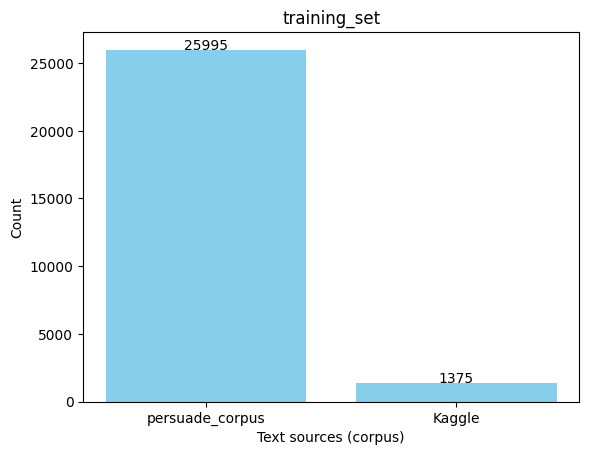

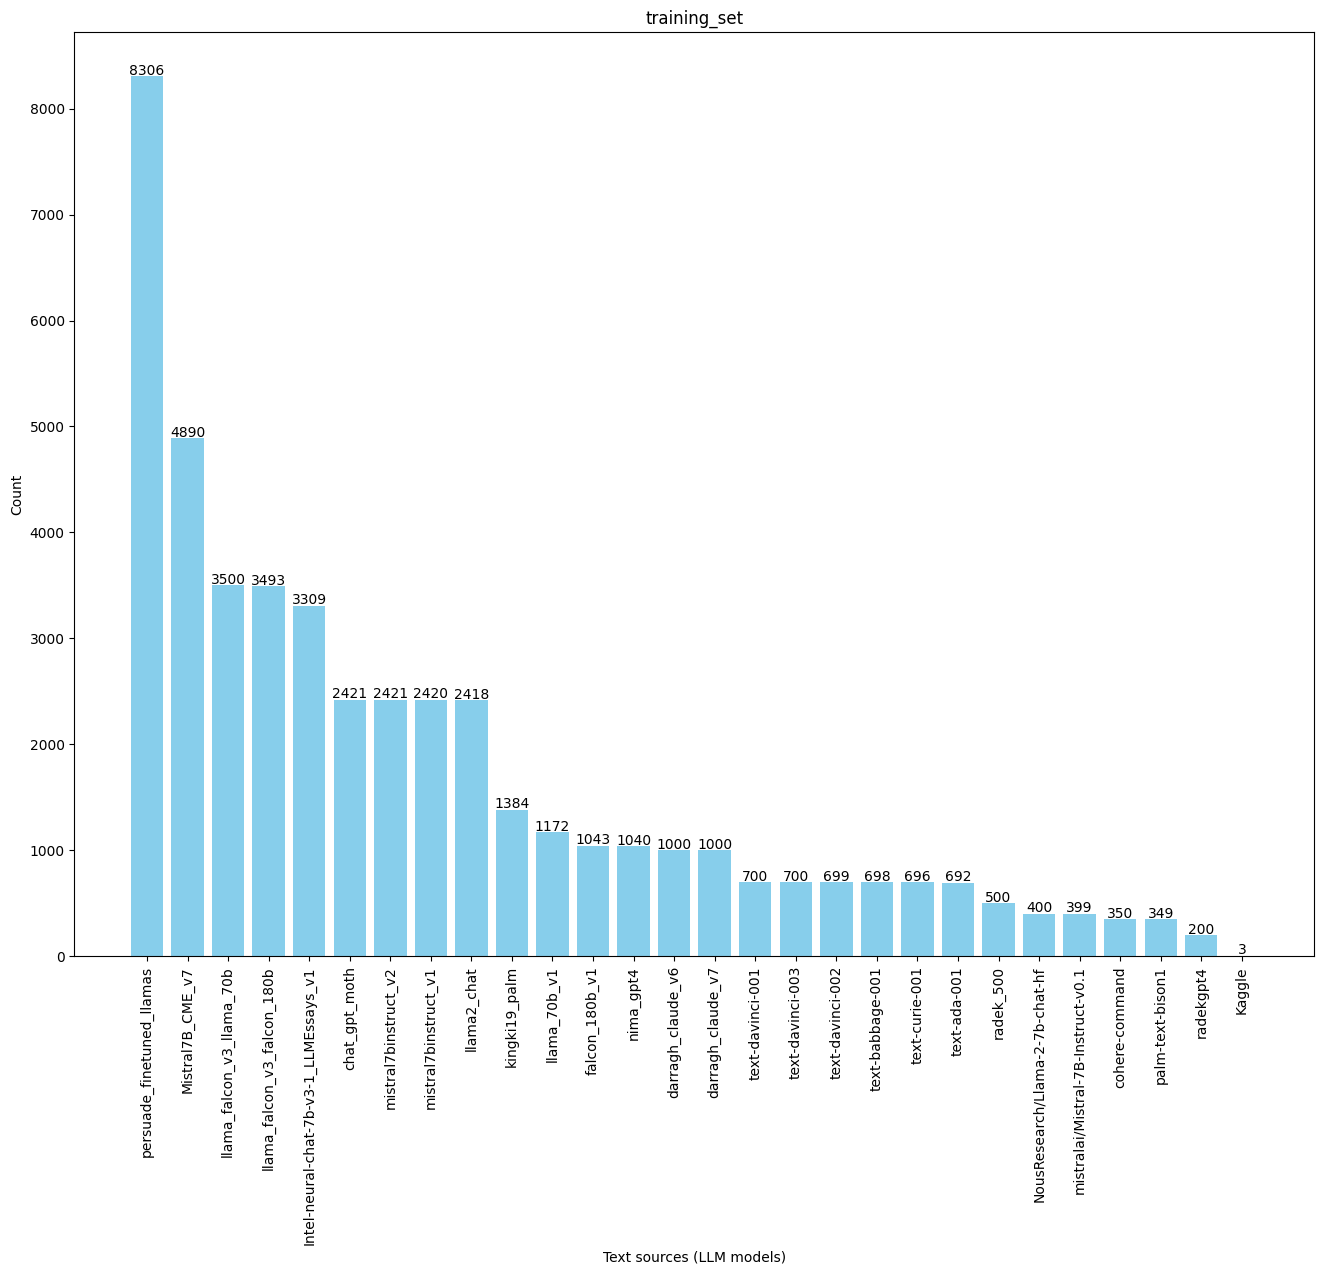

In [ ]:
print_features(training_set, 'training_set', 'source')

#Sources of human-written texts
temp_set=training_set[training_set['generated']==0] #filter in only generated==0 samples
source_count1=temp_set['source'].value_counts() #create series
sources_list1=list(source_count1.index)

#Sources of AI-generated texts
temp_set=training_set[training_set['generated']==1] #filter in only generated==1 samples
source_count2=temp_set['source'].value_counts() #create series
sources_list2=list(source_count2.index)

fig, ax=plt.subplots()
bar_plot(ax, 'Text sources (corpus)', source_count1, 'training_set', sources_list1, 0)

fig, ax=plt.subplots(figsize=(16, 12))
bar_plot(ax, 'Text sources (LLM models)', source_count2, 'training_set', sources_list2, 'vertical')

In [ ]:
#Stats on training text dataset

# Input: series lenghts
#        string unit
# Output: given the pandas series "lengths" containing the length of the training essays measured in "unit", it computes stats over it and displays them
def print_stats(lengths, unit):
    print('Texts stats in', unit)
    max_len=lengths.max()
    min_len=lengths.min()
    mean_len=lengths.mean()
    median_len=lengths.median()
    mode_len=lengths.mode()

    print('Min text length:', min_len)
    print('Max text length:', max_len)
    print('Mean text length:', round(mean_len))
    print('Median text length:', round(median_len))
    print('Mode text lengths:', list(mode_len))

    mode_count=lengths.value_counts().loc[mode_len[0]] #how many times the mode lengths occurs in the training dataset
    print("Frequency of mode length=", mode_count)
    print('\n')

# Input: axes ax
#        string feature
#        series count
# Output: given the pandas series count of the lengths of training essays measured in "unit",it plots it in the histogram "ax"
def hist_plot(ax, unit, count): #plots the "feature" count of the dataset "set_name" in a bar chart
    ax.hist(count, bins=50, color='skyblue', edgecolor='grey', density=True)
    ax.set_title('Distribution of the lengths in training texts. Unit:'+unit)
    ax.set_xlabel('Length')
    ax.set_ylabel('Frequency')
    ax.axvline(count.mean(), color='green', linestyle='solid', linewidth=3, label='Mean')
    ax.axvline(count.median(), color='red', linestyle='dashed', linewidth=3, label='Median')
    ax.axvline(count.mode()[0], color='blue', linestyle='dashed', linewidth=3, label='Mode')
    ax.legend()

Texts stats in words
Min text length: 2
Max text length: 1656
Mean text length: 385
Median text length: 360
Mode text lengths: [370]
Frequency of mode length= 262




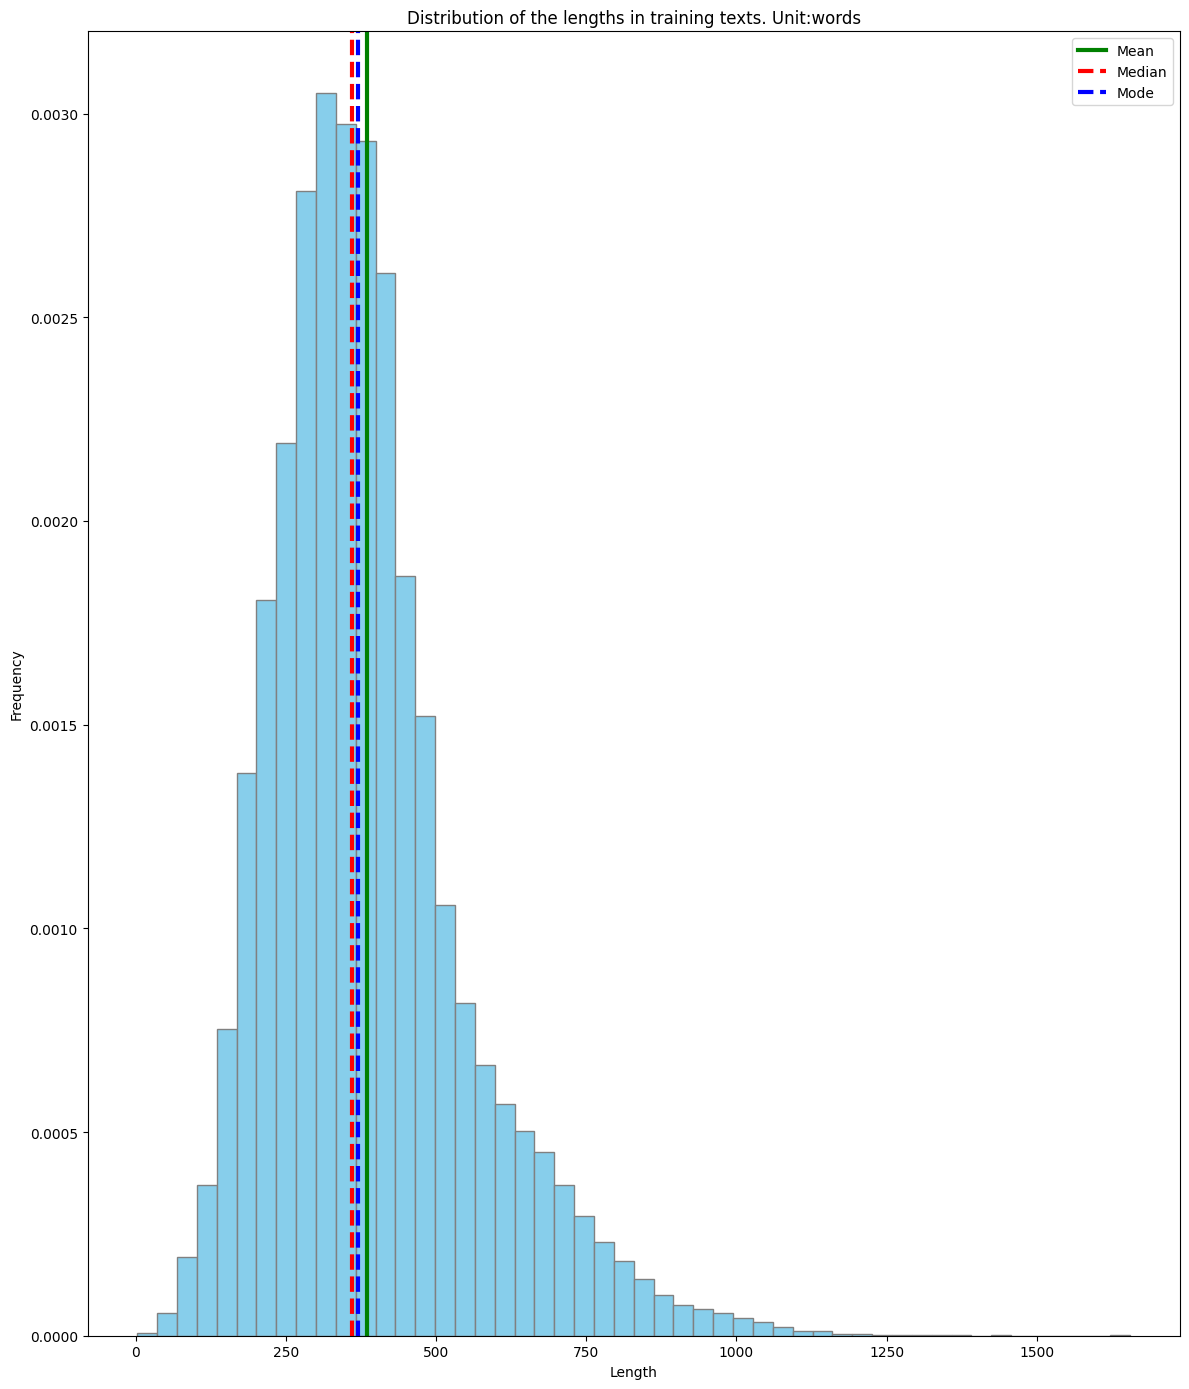

In [ ]:
num_words=training_set['text'].apply(lambda x: len(str(x).split())) #collects the word lengths of all training texts into a list
print_stats(num_words, 'words')

#Plotting stats
fig, ax=plt.subplots(figsize=(12, 14))

#histogram for words stats
hist_plot(ax, 'words', num_words)

plt.tight_layout()
plt.show()

We will now save the generated training set and prompts set in two distinct files in the project's repository.

Training sets are saved with the following nomenclature:


*   *training_set.csv* for the dataset built with only the 2 original Kaggle prompts;
*      *training_set2.csv* for the dataset built with 15 different prompts;



In [ ]:
# #Save the final dataset in a .csv file
# training_set_dir=os.path.join(working_dir, 'Project_datasets') #directory for generetad datasets
# training_set_name=os.path.join(training_set_dir, 'training_set2.csv')
# print('Training set stored in: ', training_set_name)

# try:
#     training_set.to_csv(training_set_name, index=False)
#     print("Saving successful.")
# except Exception as e:
#     print("Error occurred while saving:", e)

Training set stored in:  /content/drive/MyDrive/DL/Project/Project_datasets/training_setpippo.csv
Saving successful.


In [ ]:
# #Save the modified prompts dataset in another .csv file
# prompts_set_name=os.path.join(training_set_dir, 'prompts_set.csv')
# print('Prompts set stored in: ', prompts_set_name)

# try:
#     prompts_set.to_csv(prompts_set_name, index=False)
#     print("Saving successful.")
# except Exception as e:
#     print("Error occurred while saving:", e)

Prompts set stored in:  /content/drive/MyDrive/DL/Project/Project_datasets/prompts_set.csv
Saving successful.


# Text Preprocessing
We will now apply some standard transformations on our text samples before feeding them into the model.
The first operation is *Normalization*, aiming to make the format of the different samples more uniform. Normalization consists of:


1.   Converting numerical digits into characters;
2.   Expanding contracted forms;
3.   Removing punctuation characters;
4.   Removing extra spaces in between words;
5.   Removing characters outside the standard English alphabet;
6.   Lowercasing (convert all capital letters to lowercase);

In [ ]:
#Import and functions for text normalization
import string #collection of string constants
import re #regex operations

!pip install num2words
print('\n')
from num2words import num2words #to convert numbers into words

!pip install contractions
print('\n')
import contractions #to expand contracted forms

import nltk #library for natural language processing
nltk.download('stopwords') #common English words, often filtered out
nltk.download('wordnet') #WordNet is a lexical database
nltk.download('words')

# Input: string text
# Output: given a text "text", it converts numbers inside it into words and returns it as string
def convert_numbers(text):
    try:
        pattern1=r'\b\d+(\.\d+)\s?%\b' #matches a percentage
        pattern2=r'\b\d+(,\d+)*(\.\d+)?\b' #matches a real number
        pattern3=r'[a-zA-Z]?\d+[a-zA-Z]?' #Matches a number which may be incorporated into words

        def replace_percentage(match):
            number_str=match.group(0)
            number_str=number_str.rstrip('%') #removes the percentage symbol
            number_words=num2words(float(number_str), ordinal=False)
            return number_words+' percent'

        def replace(match): #converts matched number to its English word equivalent
            number_str=match.group(0)
            number_str=number_str.replace(',', '')
            #number_str=number_str.rstrip(',') #removes the comma symbol
            return num2words(float(number_str))

        def replace2(match):
            number_str=match.group(0)
            prefix=number_str[:1] if number_str[:1].isalpha() else ""
            suffix=number_str[-1:] if number_str[-1:].isalpha() else ""
            number_str=''.join(filter(str.isdigit, number_str)) # removes alphabetic characters from the matched string
            number_words=num2words(int(number_str))
            return prefix+' '+number_words+' '+suffix

        text=re.sub(pattern1, replace_percentage, text)
        text=re.sub(pattern2, replace, text)
        text=re.sub(pattern3, replace2, text)
        return text
    except TypeError:
        return ""
    except AttributeError:
        return ""

# Input: string text
# Output: given a text "text", it expand contracted forms and returns it as string
def expand_contractions(text):
    try:
        expanded_text=contractions.fix(text) #expands contractions in the text using the contractions library
        return expanded_text
    except TypeError:
        return ""
    except AttributeError:
        return ""

# Input: string text
# Output: given a text "text", it removes punctuation characters and returns it as string
def remove_punctuation(text):
    try:
        cleanText="".join([i for i in text if i not in string.punctuation])
        return cleanText
    except TypeError:
        return ""
    except AttributeError:
        return ""

# Input: string text
# Output: given a text "text", it removes extra spaces from and returns it as string
def remove_spaces(text):
    try:
        text=text.strip() #remove leading and trailing white space
        cleanText=text=" ".join(text.split()) #replace multiple consecutive white space characters with a single space
        return cleanText
    except TypeError:
        return ""
    except AttributeError:
        return ""

# Input: string text
# Output: given a text "text", it removes all letters/characters outside the English alphabet and returns it as string
def remove_letters(text):
    try:
        pattern=re.compile(r'[^a-zA-Z\s]')
        cleanText=re.sub(pattern, '', text)
        return cleanText
    except TypeError:
        return ""
    except AttributeError:
        return ""

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=09654d9af7583972dd0933fdffba007b03fa405dc0ee205f880c00057c7009af
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.3 MB/s eta 0:00:00




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
#Download datasets generated through augmentation for pre-processing

print('Available data:')
training_set_dir=os.path.join(working_dir, 'Project_datasets') #directory for generetad datasets
trainSets=[] #list of relevant files
pattern=re.compile(r'training_set.*\.csv$')
for f in os.listdir(training_set_dir): #inspect folder's content
    if pattern.match(f):
      print('-', f)
      trainSets.append(f)
print('\n')

#Index 0 = dataset generated with strategy 1
#Indez 1 = dataset generated with strategy 2
training_set=load_dataframe_and_print_info(training_set_dir, trainSets[1])

training_set.info()
pd.set_option('display.max_colwidth', 1)
training_set

Available data:
- training_set.csv
- training_set2.csv


Dataset training_set2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73573 entries, 0 to 73572
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       73573 non-null  object
 1   generated  73573 non-null  int64 
 2   prompt_id  73573 non-null  int64 
 3   source     73573 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73573 entries, 0 to 73572
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       73573 non-null  object
 1   generated  73573 non-null  int64 
 2   prompt_id  73573 non-null  int64 
 3   source     73573 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


text  \
0      Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "Paris bans driving due to smog," by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.\n\nLikewise, in the article, "Carfree day is spinning into a big hit in Bogota," by Andrew Selsky says, how programs that's set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs for a long time, traffic jams have gone down, and restaurants and shopping districts have popped up, all due to the fact of having less cars around.\n\nIn conclusion, the use of less cars and having carfree days, have had a big impact on the environment of cities because, it is cutting down the air pollution that the cars have majorly polluted, it has aloud countries like Columbia to repair sidewalks, and cut down traffic jams. Limiting the use of cars would be a good thing for America. So we should limit the use of cars by maybe riding a bike, or maybe walking somewhere that isn't that far from you and doesn't need the use of a car to get you there. To me, limiting the use of cars might be a good thing to do.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
#Text Normalization
print('Starting text normalization.')
print('\n')

#Step 1: converting number digits into letters
print('Converting numbers to their English word equivalent...')
print('\n')

training_set['text']=training_set['text'].apply(lambda x: convert_numbers(x))

#Step 2: expanding contracted forms (optional)
print('Expanding contracted forms...')
print('\n')

training_set['text']=training_set['text'].apply(lambda x: expand_contractions(x))

#Step 3: remove punctuation
print('Remove the following punctuation characters:')
print(string.punctuation)
print('\n')

training_set['text']=training_set['text'].apply(lambda x: remove_punctuation(x))

#Step 4: remove extra spaces
print('Removing extra spaces from training essays...')
print('\n')

training_set['text']=training_set['text'].apply(lambda x: remove_spaces(x))

#Step 5: removing non-english characters
print('Removing non-English letters and symbols from training essays...')
print('\n')

training_set['text']=training_set['text'].apply(lambda x: remove_letters(x))

#Step 6: lower-casing
print('Lowercasing training essays...')
print('\n')

training_set['text']=training_set['text'].apply(lambda x: x.lower())

print('Normalization done.')
pd.set_option('display.max_colwidth', 1)

Starting text normalization.


Converting numbers to their English word equivalent...


Expanding contracted forms...


Remove the following punctuation characters:
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Removing extra spaces from training essays...


Removing non-English letters and symbols from training essays...


Lowercasing training essays...


Normalization done.


The next step is *Tokenization*: breaking down our sample texts into smaller units ("tokens") that can be more easily analyzed and processed by our DL model.

We adopted words as tokenization unit.

Our texts are converted from strings into arrays of strings.

In [ ]:
#Tokenization

nltk.download('punkt') #download data for tokenization
from nltk.tokenize import word_tokenize #function that realizes text tokenization into words

# Input: string text
# Output: given a text "text", it applies tokenization to it using nltk tokenizer and returns it as a list of words (string[])
def tokenizer(text):
    try:
        return word_tokenize(text)
    except TypeError:
        emptyText=[]
        return emptyText
    except AttributeError:
        emptyText=[]
        return emptyText

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print("Tokenizing sample texts...")
print('\n')
training_set['text']=training_set['text'].apply(lambda x: tokenizer(x))
print("Tokenization Done.")

Tokenizing sample texts...


Tokenization Done.


The next step is *words removal*, cosisting of:

1.  **Toxicity removal:** filtering out harmful, offensive, or inappropriate language from text data. In order to do this, we filter our texts using a pre-compiled list of inappropriate English words stored in a file LDNOOBW.txt ("List of Dirty, Naughty Or Otherwise Bad Words");
2.   **Stop Words removal (optional):** filtering out common words (like 'the', 'and', 'is', etc) that usually do not carry significant meaning. We choose to perform this pre-processing step optionally, so we will obtain both pre-processed samples without stop words and pre-processed samples still containing stop words;



In [ ]:
#Words Removal

# Input: string[] text
#        string file_path
# Output: given a tokenized text "text", it eliminates DNOOBW words listed in the file "file_path" from it and returns it as string[]
def remove_DNOOBW(text, file_path):
    if not os.path.exists(file_path):
        print(f"File not found at path: {file_path}")
        return text
    try:
        with open(file_path, 'r') as file:
            words_to_remove=set(file.read().splitlines())
    except IOError:
        print(f"Error reading file at path: {file_path}")
        return text
    cleanText=[word for word in text if word not in words_to_remove]
    return cleanText

# Input: string[] text
#        string[] stopwors
# Output: given a tokenized text "text", it removes words from the list "stopwords" and returns it as string[]
def remove_stop_words(text, stopwords):
    try:
        cleanText=[i for i in text if i not in stopwords]
        return cleanText
    except TypeError:
        emptyText=[]
        return emptyText
    except AttributeError:
        emptyText=[]
        return emptyText

In [ ]:
#Step 1: removing bad words
file_path=os.path.join(working_dir, 'LDNOOBW.txt')

print('Removing DNOOBW words in the training texts...')
print('\n')

training_set['text']=training_set['text'].apply(lambda x: remove_DNOOBW(x, file_path))

#Step 2: stop-words removal (optional)
stopwords=nltk.corpus.stopwords.words('english')
print('Remove the following stop-words:')
print(len(stopwords))
print(stopwords)
print('\n')

training_set['text']=training_set['text'].apply(lambda x: remove_stop_words(x, stopwords))

print("Words Removal done.")

Removing DNOOBW words in the training texts...


Remove the following stop-words:
179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most

The next step in our preprocessing consists into cutting out all text samples falling short of a minimum threshold of 100 tokens (words). Too short texts may be ambiguous for the model and just constitute noise inside the training set.

In [ ]:
#Cutting out short texts
min_threshold=100
lengths=training_set['text'].apply(len)
print(lengths)
print('\n')
print('Cutting texts under this token threshold: ', min_threshold)

training_set=training_set[training_set['text'].apply(len) >= min_threshold]
training_set.reset_index(drop=True, inplace=True)

print("Short texts eliminated.")

0        325
1        268
2        408
3        366
4        467
        ... 
73568    171
73569    331
73570    274
73571    98 
73572    187
Name: text, Length: 73573, dtype: int64


Cutting texts under this token threshold:  100
Short texts eliminated.


We may perform a final optional step in our pre-processing, which can consist of either:


1.   **Stemming (optional):** reducing a word to its base or root form, removing suffixes. The resulting "stem" may not be a real word, but it is meant to capture the word's core meaning;
2.   **Lemmatization (optional):** reducing a word to its base or dictionary form ("lemma"), which is a valid word;



In [ ]:
from nltk.stem.porter import PorterStemmer #tool for "stemming" (reducing a word to its root)

# Input: string[] text
#        PorterStemmer porter_stemmer
# Output: given a tokenized text "text", it applies stemming to it using PorterStemmer and returns it as string[]
def stemming(text, porter_stemmer):
    try:
        stemText=[porter_stemmer.stem(word) for word in text]
        return stemText
    except TypeError:
        emptyText=[]
        return emptyText
    except AttributeError:
        emptyText=[]
        return emptyText

In [ ]:
## Stemming (optional)
# porter_stemmer=PorterStemmer()
# print('Stemming training essays...')
# print('\n')

# training_set['text']=training_set['text'].apply(lambda x: stemming(x, porter_stemmer))
# print('Stemming done.')

In [ ]:
from nltk.stem import WordNetLemmatizer #tool for "lemmatization" (reducing a word to its basic dictionary form)

# Input: string[] text
#        WordNetLemmatizer wordnet_lemamtizer
# Output: given a tokenized text "text", it applies lemmatization to it using WordNetLemmatizer and returns it
def lemmatizer(text, wordnet_lemmatizer):
    try:
        lemmText=[wordnet_lemmatizer.lemmatize(word) for word in text]
        return lemmText
    except TypeError:
        emptyText=[]
        return emptyText
    except AttributeError:
        emptyText=[]
        return emptyText

In [ ]:
# # Lemmatization (optional)
# wordnet_lemmatizer=WordNetLemmatizer()
# print('Lemmatizing training essays...')
# print('\n')

# training_set['text']=training_set['text'].apply(lambda x: lemmatizer(x, wordnet_lemmatizer))
# print('Lemmatization done.')

The pre-processing operations performed have been the following:


1.   **Standard:** normalization, tokenization, toxicity removal, short-texts trimming;
2.   **Optional:** stop words removal, stemming/lemmatization;

So, at the end, we have applied six different pre-processing procedures to our dataset for training and validation:


*   Standard;
*   Standard + stop words removal;
*   Standard + stemming;
*   Standard + lemmatization;
*   Standard + stop words removal + stemming;
*   Standard + stop words removal + lemmatization;

We ought to remember that we have initially assembled two different datasets with data augmentation (one with just two prompts and another with 15 different prompts), so in the end we have 12 different pre-processed version for the training and validation of our network.







In [ ]:
training_set.info()
print('\n')
pd.set_option('display.max_colwidth', 1)
training_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66731 entries, 0 to 66730
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       66731 non-null  object
 1   generated  66731 non-null  int64 
 2   prompt_id  66731 non-null  int64 
 3   source     66731 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.0+ MB




,text,generated,prompt_id,source
0,"[cars, cars, around, since, became, famous, one, thousand, nine, hundred, henry, ford, created, built, first, modelt, cars, played, major, role, every, day, lives, since, people, starting, question, limiting, car, usage, would, good, thing, limiting, use, cars, might, good, thing, like, matter, article, german, suburb, life, goes, without, cars, elizabeth, rosenthal, states, automobiles, linchpin, suburbs, middle, class, families, either, shanghai, chicago, tend, make, homes, experts, say, huge, impediment, current, efforts, reduce, greenhouse, gas, emissions, tailpipe, passenger, cars, responsible, twelve, percent, greenhouse, gas, emissions, europeand, fifty, percent, carintensive, areas, united, states, cars, main, reason, greenhouse, gas, emissions, lot, people, driving, around, time, ...]",0,0,Kaggle
1,"[transportation, large, necessity, countries, worldwide, doubt, cars, buses, means, transportation, make, going, place, place, easier, faster, however, always, negative, pollution, although, mobile, transportation, huge, part, daily, lives, endangering, earth, harmful, greenhouse, gases, could, suppressed, small, suburb, community, germany, called, vauban, started, carfree, lifestyle, city, markets, stores, placed, nearby, homes, instead, located, farend, highways, although, vauban, completely, carfree, seventy, vauban, families, cars, even, large, fiftyseven, families, stated, sold, cars, move, vauban, families, even, said, less, stressed, depending, car, transportation, cars, responsible, twelve, greenhouse, gases, even, fifty, carintensive, areas, united, states, another, insight, reduced, car, zones, brings, paris, incident, smog, paris, officials, ...]",0,0,Kaggle
2,"[americas, love, affair, vehicles, seems, cooling, says, elisabeth, rosenthal, understand, rosenthals, perspective, easier, suggest, americas, car, usage, decreasing, slowly, necessarily, bad, sense, certain, positive, effects, advantages, limiting, car, usage, includes, increase, security, health, along, decrease, pollution, dependence, firstly, car, usage, limited, security, health, likely, guaranteed, feeling, secure, highly, important, individuals, everywhere, example, many, people, colombia, used, public, transportation, car, free, day, leaving, streets, capital, city, according, andrew, selsky, eerily, devoid, traffic, jams, complications, stem, traffic, jams, end, feeling, confidence, plan, get, point, b, simple, second, ago, complication, personal, plans, leads, become, stressed, feeling, doubt, overcomes, thoughts, car, usage, limited, would, ...]",0,0,Kaggle
3,"[often, ride, car, drive, one, motor, vehicle, work, store, mall, ever, thought, many, people, world, exact, thing, travel, every, destination, using, fuel, powered, motorvehicle, many, people, realize, intensive, damage, turn, key, ignition, drive, work, today, like, regular, car, user, thought, could, never, survive, without, car, may, run, mind, possible, though, live, without, main, mean, transport, look, cities, like, cuban, paris, bogota, one, way, restricted, peoples, usage, cars, actually, enjoy, limit, car, usage, intern, result, many, advantages, benefits, community, recognized, benefit, giving, car, usage, would, positive, consequences, health, source, one, heidrun, walter, states, car, always, tense, much, happier, without, think, imagine, ...]",0,0,Kaggle
4,"[cars, wonderful, thing, perhaps, one, worlds, greatest, advancements, technologies, cars, get, us, point, point, exactly, want, humans, want, get, one, place, anther, fast, possiile, cars, suitaile, get, us, across, city, matter, minutes, much, faster, anyhting, else, train, going, get, across, city, fast, car, neither, puilic, ius, iut, forms, transportation, might, ie, way, go, get, wrong, cars, aisolutly, amazing, thing, iut, mayie, way, much, stress, mayie, hurt, environment, ways, think, ius, train, worry, aiout, washing, car, getting, frustrated, stuck, iad, traffic, jam, four, a

Texts stats in words
Min text length: 100
Max text length: 892
Mean text length: 217
Median text length: 198
Mode text lengths: [193]
Frequency of mode length= 439




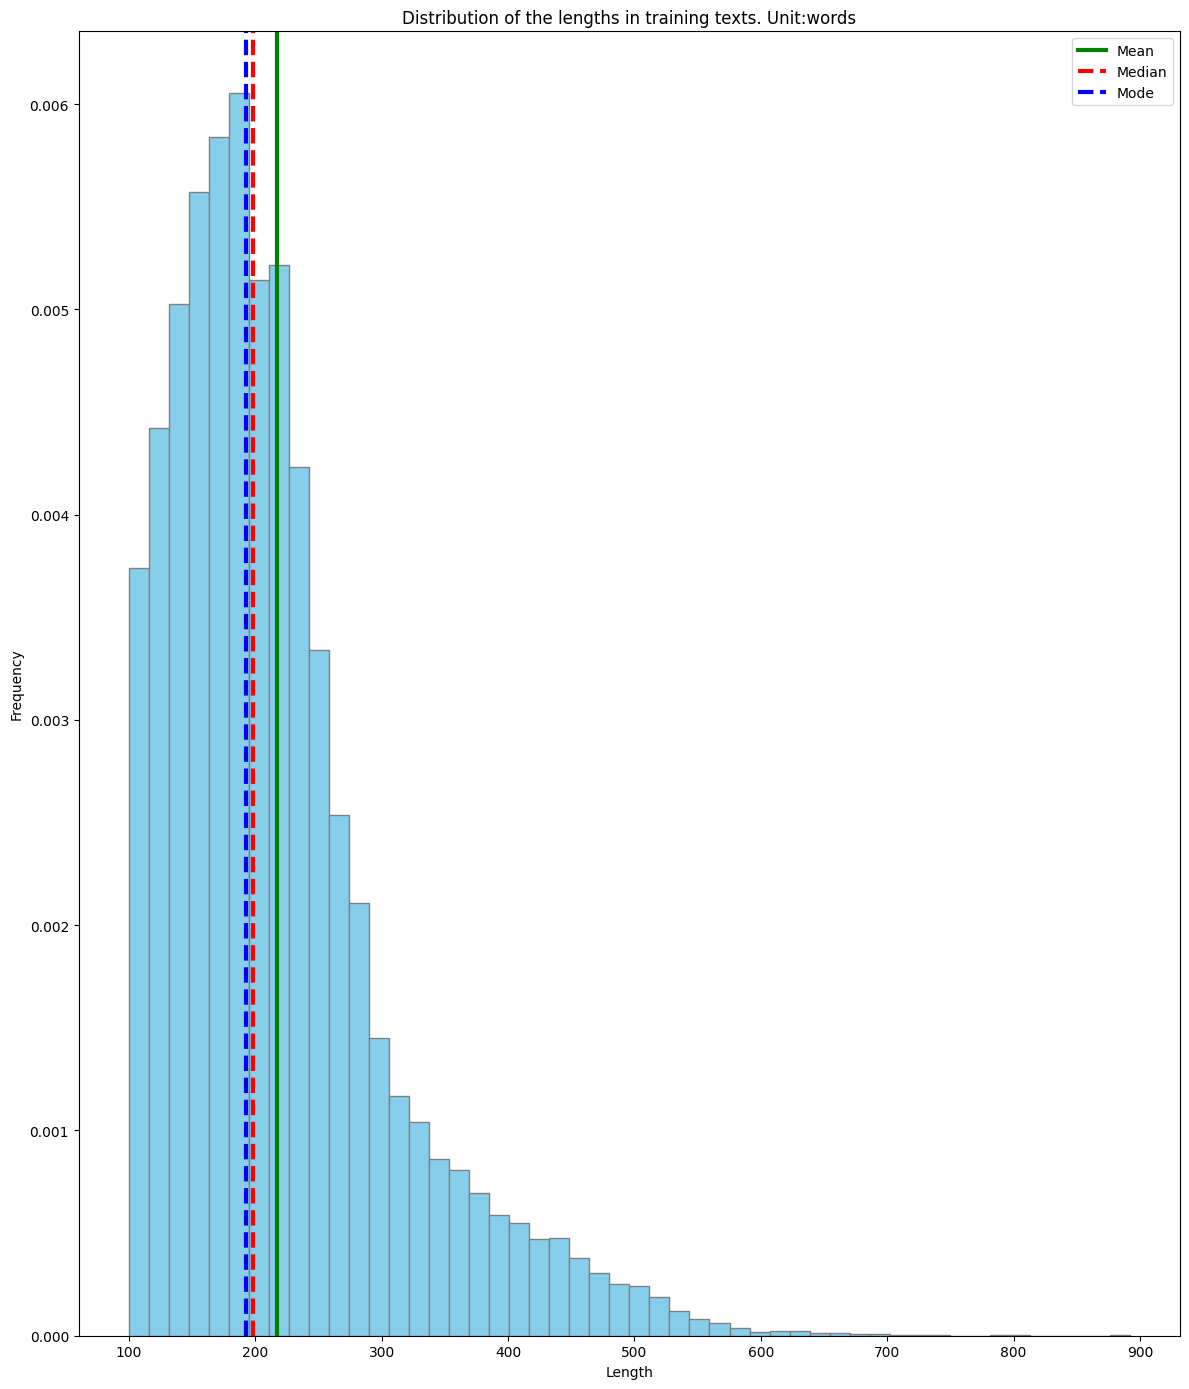

In [ ]:
#Stats on final pre-processed dataset for training and validation

lengths=training_set['text'].apply(len)
print_stats(lengths, 'words')

#Plotting stats
fig, ax=plt.subplots(figsize=(12, 14))

#histogram for words stats
hist_plot(ax, 'words', lengths)

plt.tight_layout()
plt.show()

In [ ]:
unique_words=set() #set containing all unique words present in the sample texts
word_occurrences={} #dictionary associating each word with the number of times it occurs in the sample texts

for text in training_set['text']:
    #update occurrences
    for word in text:
        unique_words.add(word)
        word_occurrences[word]=word_occurrences.get(word, 0)+1

num_unique_words=len(unique_words)
print(f"Unique words: {num_unique_words}")
#print(unique_words)
print("\n")

print("Occurrences per word:")
print(word_occurrences)
print("\n")

#print("sorted dictionary on occurrencies:")
#sorted_word_occurrences = dict(sorted(word_occurrences.items(), key=lambda item: item[1], reverse=True))
#print(sorted_word_occurrences)

Unique words: 116685


Occurrences per word:
{'cars': 99351, 'around': 20209, 'since': 9959, 'became': 2349, 'famous': 1206, 'one': 99134, 'thousand': 27814, 'nine': 13734, 'hundred': 23133, 'henry': 57, 'ford': 474, 'created': 10436, 'built': 1394, 'first': 22722, 'modelt': 10, 'played': 1370, 'major': 8356, 'role': 5597, 'every': 14535, 'day': 22200, 'lives': 13244, 'people': 121667, 'starting': 1631, 'question': 4294, 'limiting': 22502, 'car': 74413, 'usage': 33844, 'would': 129950, 'good': 34796, 'thing': 13965, 'use': 46760, 'might': 27127, 'like': 72736, 'matter': 6497, 'article': 27053, 'german': 959, 'suburb': 1053, 'life': 48234, 'goes': 3913, 'without': 21489, 'elizabeth': 91, 'rosenthal': 1885, 'states': 59854, 'automobiles': 1237, 'linchpin': 61, 'suburbs': 1113, 'middle': 1945, 'class': 19201, 'families': 3605, 'either': 3607, 'shanghai': 72, 'chicago': 172, 'tend': 2543, 'make': 65519, 'homes': 1148, 'experts': 1693, 'say': 16609, 'huge': 3084, 'impediment': 128, 'current

We will now save the pre-processed training set into a file in the project's repository.

Training sets are saved with the following nomenclature:


*   A *2* in the name indicates that the dataset is built with 15 different prompts (otherwise, the dataset is built with only the 2 original Kaggle prompts);
*   *SW* indicates that standard pre-processing + stop words removal have been applied to the dataset;
*   *S* indicates that standard pre-processing + stemming have been applied to the dataset;
*   *L* indicates that standard pre-processing + lemmatization have been applied to the dataset;
*   *SWS* indicates that standard pre-processing + stop words removal + stemming have been applied to the dataset;
*   *SWL* indicates that standard pre-processing + stop words removal + lemmatization have been applied to the dataset;
*   If neither code (*SW*, *S*, *L*, *SWS*, *SWL*) is in the name, then only standard pre-processing has been applied to the dataset;

In [ ]:
# #Save the final dataset in a .csv file
# training_set_dir=os.path.join(working_dir, 'Project_datasets')
# training_set_name=os.path.join(training_set_dir, 'processed_training_set2SWL.csv')
# print('Training set stored in: ', training_set_name)

# try:
#     training_set.to_csv(training_set_name, index=False)
#     print("Saving successful.")
# except Exception as e:
#     print("Error occurred while saving:", e)

# Test Set
In order to properly evaluate our model, we assemble a test set with different text samples from the ones used for training and validation.

We assemble a dataset for testing from the following DAIGT datasets:

1. train_drcat_01.csv;
2. train_drcat_02.csv;
3. train_drcat_03.csv;
4. train_drcat_04.csv;

We make sure that no duplicate texts nor empty texts are present in the final testing set.

In [ ]:
# Input: dataframe test_set
#        dataframe extention_set
#        string train_set_name
# Output: it returns the dataframe "test_set" extended with entries from the dataset "extension_set", making sure that the samples are not present in the dataset
#         "train_set_name"
def extend_test_set(test_set, extension_set, train_set_name):
    train_set=pd.read_csv(train_set_name)
    for index, row in extension_set.iterrows():
        if pd.notna(row['text']) and row['text'] not in test_set['text'].values and row['text'] not in train_set['text'].values:
            if 'prompt' not in extension_set.columns:
                prompt=""
            else:
                prompt=row['prompt']
            values={'text': row['text'], 'generated': row['label'], 'prompt_id': prompt, 'source': row['source']}
            new_entry=pd.DataFrame([values], columns=['text', 'generated', 'prompt_id', 'source'])
            test_set=pd.concat([test_set, new_entry], ignore_index=True)
    return test_set


In [ ]:
print('Available data:')
test_dir=os.path.join(working_dir, 'DAIGT_testsets') #directory of DAIGT testsets
filenames3=[] #list of relevant files
for f in os.listdir(test_dir): #inspect folder's content
    if f[-4:]=='.csv': #datasets are stored in the .csv format
      print('-', f)
      filenames3.append(f)
print('\n')

extra2=[] #array of pandas dataframes containing the DAIGT testsets downloaded from Kaggle
for i in range(len(filenames3)):
   extra2.append(load_dataframe_and_print_info(test_dir, filenames3[i]))

columns=["text", "generated", "prompt_id", "source"]
test_set=pd.DataFrame(columns=columns)
training_set_dir=os.path.join(working_dir, 'Project_datasets')
training_set_name=os.path.join(training_set_dir, 'training_set2.csv')

for i in range(len(extra2)):
    test_set=extend_test_set(test_set, extra2[i], training_set_name)

test_set.info()
pd.set_option('display.max_colwidth', 1)
test_set

Available data:
- train_drcat_04.csv
- train_drcat_03.csv
- train_drcat_02.csv
- train_drcat_01.csv


Dataset train_drcat_04.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44206 entries, 0 to 44205
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   essay_id  44206 non-null  object
 1   text      44206 non-null  object
 2   label     44206 non-null  int64 
 3   source    44206 non-null  object
 4   prompt    12911 non-null  object
 5   fold      44206 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


Dataset train_drcat_03.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42206 entries, 0 to 42205
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   essay_id  42206 non-null  object
 1   text      42206 non-null  object
 2   label     42206 non-null  int64 
 3   source    42206 non-null  object
 4   prompt    11911 non-null  object
 5   f

,text,generated,prompt_id,source
0,"The positive attitude is the key of the success in the life. I agree with this statement. We has to have a good attitude everyday in everywhere. In the work, school, and in the house.\n\nFirts, I agree because the attitude is one of the main charisma in a person. In the work everyone has to have a good character with attitude because is important to be a good workers. In the work is very important to arrive all the time with good attitude and be amiable. The customer can stay happy with the workers work with a good attitude. The customer give tips, and the workers are happy. The workers don't have problems with the chief or the boss.\n\nSecond, I think that the attitude is important have in the school because every student have to go to the school everyday with a good attitude. The attitude is one of the main charisma that a student has to have. The students with a good attitude everyone spectable by othres students. The attitude is important to have friendly relations. When they are graduated they remenber that it's important to be good with others and continued in to be good person with a good attitude.\n\nFinally, in the house it's important to keep a good character with good attitude. I think that in the family is more important to have a good attitude. If everyone have a good attitude we live in armony and don't had problems to each others. The attitude in the family is one of the most important that everyone has and live without of problems.\n\nIn conclusion, the attitude is one of the main charism that one person can had. many people don't have a good attitude with others , but it's important have good attitude in everywhere to be a good people.",0,"Task: Write an essay discussing why attitude is an important charisma for success in life. Explore its importance in the workplace, school, and at home.",original_moth
1,"Having school every single day is nobodies favorite free time to others it's there favorite hobby it also takes time and alot of studying to. There making everything so easy for us this year they will do 3 years of high school if I studying really hard to not stay for all 4 years by that addition they will be including to have courses during on summers or in evenings or may not be able to take elective courses. Which will be really helpful for me to have more hours to myself more of my free time I could studying way more to. More than I knew about these prgrams im glad I found about it because it can be a big change for me and everybody else. It's a 50 50 deal to me because your going to miss on 1 year ,but also you can do so much go apply to colleges and have a job because you would have more time for all the better thats coming to you.\n\nOn the outcome you would be helping yourself out spend your summer on school time or you can have less hours of going to school on evenings sleep in more in the miday. All 4 years you can be doing the total of 3 years you would just be doing fulltime but it's also the choice you make on evenings or in the summer days. Luckily you can do anthing what you want and could imagine if you can put your mind to it and it will appear better days. Although everything in life you will get because its how you want your future to be but if it's for you it will not go away. At any age you can graduate young or as a older person but when you do you will be a successful leader.\n\nMy main priority in life is school since I was a child I always love coming in to school it was always my focus in life to overcome the end of it. School has always been my favorite because you saw your friends and it's how you start your day also good connection than having a studying buddy to make everything work. A high school deploma is your way to the next door it's access to everything you will ever need later on to your future. After your done high school you will be feeling as a pot of gold apply in purssure and you will get there apply to many awesome colleges and n

We will now save the raw test set.

In [ ]:
#Save the final testset in a .csv file
test_set_name=os.path.join(training_set_dir, 'test_set.csv')
print('Training set stored in: ', test_set_name)

try:
    test_set.to_csv(test_set_name, index=False)
    print("Saving successful.")
except Exception as e:
    print("Error occurred while saving:", e)

Training set stored in:  /content/drive/MyDrive/DL/Project/Project_datasets/test_set.csv
Saving successful.


We will now apply the same pre-processing adopted for the training/validation set on the testset.

In [ ]:
print('Available data:')
training_set_dir=os.path.join(working_dir, 'Project_datasets') #directory for generetad datasets
testSets=[] #list of relevant files
pattern=re.compile(r'test_set.*\.csv$')
for f in os.listdir(training_set_dir): #inspect folder's content
    if pattern.match(f):
      print('-', f)
      testSets.append(f)
print('\n')

test_set=load_dataframe_and_print_info(training_set_dir, trainSets[0])

test_set.info()
pd.set_option('display.max_colwidth', 1)
test_set

Available data:
- test_set.csv


Dataset test_set.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5534 entries, 0 to 5533
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5534 non-null   object
 1   generated  5534 non-null   int64 
 2   prompt_id  4675 non-null   object
 3   source     5534 non-null   object
dtypes: int64(1), object(3)
memory usage: 173.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5534 entries, 0 to 5533
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5534 non-null   object
 1   generated  5534 non-null   int64 
 2   prompt_id  4675 non-null   object
 3   source     5534 non-null   object
dtypes: int64(1), object(3)
memory usage: 173.1+ KB


,text,generated,prompt_id,source
0,"The positive attitude is the key of the success in the life. I agree with this statement. We has to have a good attitude everyday in everywhere. In the work, school, and in the house.\n\nFirts, I agree because the attitude is one of the main charisma in a person. In the work everyone has to have a good character with attitude because is important to be a good workers. In the work is very important to arrive all the time with good attitude and be amiable. The customer can stay happy with the workers work with a good attitude. The customer give tips, and the workers are happy. The workers don't have problems with the chief or the boss.\n\nSecond, I think that the attitude is important have in the school because every student have to go to the school everyday with a good attitude. The attitude is one of the main charisma that a student has to have. The students with a good attitude everyone spectable by othres students. The attitude is important to have friendly relations. When they are graduated they remenber that it's important to be good with others and continued in to be good person with a good attitude.\n\nFinally, in the house it's important to keep a good character with good attitude. I think that in the family is more important to have a good attitude. If everyone have a good attitude we live in armony and don't had problems to each others. The attitude in the family is one of the most important that everyone has and live without of problems.\n\nIn conclusion, the attitude is one of the main charism that one person can had. many people don't have a good attitude with others , but it's important have good attitude in everywhere to be a good people.",0,"Task: Write an essay discussing why attitude is an important charisma for success in life. Explore its importance in the workplace, school, and at home.",original_moth
1,"Having school every single day is nobodies favorite free time to others it's there favorite hobby it also takes time and alot of studying to. There making everything so easy for us this year they will do 3 years of high school if I studying really hard to not stay for all 4 years by that addition they will be including to have courses during on summers or in evenings or may not be able to take elective courses. Which will be really helpful for me to have more hours to myself more of my free time I could studying way more to. More than I knew about these prgrams im glad I found about it because it can be a big change for me and everybody else. It's a 50 50 deal to me because your going to miss on 1 year ,but also you can do so much go apply to colleges and have a job because you would have more time for all the better thats coming to you.\n\nOn the outcome you would be helping yourself out spend your summer on school time or you can have less hours of going to school on evenings sleep in more in the miday. All 4 years you can be doing the total of 3 years you would just be doing fulltime but it's also the choice you make on evenings or in the summer days. Luckily you can do anthing what you want and could imagine if you can put your mind to it and it will appear better days. Although everything in life you will get because its how you want your future to be but if it's for you it will not go away. At any age you can graduate young or as a older person but when you do you will be a successful leader.\n\nMy main priority in life is school since I was a child I always love coming in to school it was always my focus in life to overcome the end of it. School has always been my favorite because you saw your friends and it's how you start your day also good connection than having a studying buddy to make everything work. A high school deploma is your way to the next door it's access to everything you will ever need later on to your future. After your done high school you will be feeling as a pot of gold apply in purssure and you will get there apply to many awesome colleges and n

In [ ]:
#Text Normalization
print('Starting testing texts normalization.')
print('\n')

#Step 1: converting number digits into letters
print('Converting numbers to their English word equivalent...')
print('\n')

test_set['text']=test_set['text'].apply(lambda x: convert_numbers(x))

#Step 2: expanding contracted forms (optional)
print('Expanding contracted forms...')
print('\n')

test_set['text']=test_set['text'].apply(lambda x: expand_contractions(x))

#Step 3: remove punctuation
print('Remove the following punctuation characters:')
print(string.punctuation)
print('\n')

test_set['text']=test_set['text'].apply(lambda x: remove_punctuation(x))

#Step 4: remove extra spaces
print('Removing extra spaces from testing essays...')
print('\n')

test_set['text']=test_set['text'].apply(lambda x: remove_spaces(x))

#Step 5: removing non-english characters
print('Removing non-English letters and symbols from testing essays...')
print('\n')

test_set['text']=test_set['text'].apply(lambda x: remove_letters(x))

#Step 6: lower-casing
print('Lowercasing testing essays...')
print('\n')

test_set['text']=test_set['text'].apply(lambda x: x.lower())

print('Normalization done.')

Starting testing texts normalization.


Converting numbers to their English word equivalent...


Expanding contracted forms...


Remove the following punctuation characters:
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Removing extra spaces from testing essays...


Removing non-English letters and symbols from testing essays...


Lowercasing testing essays...


Normalization done.


In [ ]:
print('\n')
print("Tokenizing testing texts...")
print('\n')
test_set['text']=test_set['text'].apply(lambda x: tokenizer(x))
print("Tokenization Done.")



Tokenizing testing texts...


Tokenization Done.


In [ ]:
#Step 1: removing bad words
file_path=os.path.join(working_dir, 'LDNOOBW.txt')

print('Removing DNOOBW words in the testing texts...')
print('\n')

test_set['text']=test_set['text'].apply(lambda x: remove_DNOOBW(x, file_path))

# #Step 2: stop-words removal (optional)
# stopwords=nltk.corpus.stopwords.words('english')
# print('Remove the following stop-words:')
# print(len(stopwords))
# print(stopwords)
# print('\n')

# test_set['text']=test_set['text'].apply(lambda x: remove_stop_words(x, stopwords))

# print("Words Removal done.")

Removing DNOOBW words in the testing texts...




In [ ]:
print('Cutting testing texts under this token threshold: ', min_threshold)

test_set=test_set[test_set['text'].apply(len) >= min_threshold]
test_set.reset_index(drop=True, inplace=True)

print("Short texts eliminated.")

Cutting testing texts under this token threshold:  100
Short texts eliminated.


In [ ]:
# # Stemming (optional)
# porter_stemmer=PorterStemmer()
# print('Stemming test essays...')
# print('\n')

# test_set['text']=test_set['text'].apply(lambda x: stemming(x, porter_stemmer))
# print('Stemming done.')

Stemming test essays...


Stemming done.


<ipython-input-78-912001cb652d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['text']=test_set['text'].apply(lambda x: stemming(x, porter_stemmer))


In [ ]:
# Lemmatization (optional)
wordnet_lemmatizer=WordNetLemmatizer()
print('Lemmatizing test essays...')
print('\n')

test_set['text']=test_set['text'].apply(lambda x: lemmatizer(x, wordnet_lemmatizer))
print('Lemmatization done.')

Lemmatizing test essays...


Lemmatization done.


<ipython-input-86-7c4066740e8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['text']=test_set['text'].apply(lambda x: lemmatizer(x, wordnet_lemmatizer))


In [ ]:
test_set.info()
print('\n')
pd.set_option('display.max_colwidth', 1)
test_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5514 non-null   object
 1   generated  5514 non-null   int64 
 2   prompt_id  4655 non-null   object
 3   source     5514 non-null   object
dtypes: int64(1), object(3)
memory usage: 172.4+ KB




,text,generated,prompt_id,source
0,"[the, positive, attitude, is, the, key, of, the, success, in, the, life, i, agree, with, this, statement, we, ha, to, have, a, good, attitude, everyday, in, everywhere, in, the, work, school, and, in, the, house, firts, i, agree, because, the, attitude, is, one, of, the, main, charisma, in, a, person, in, the, work, everyone, ha, to, have, a, good, character, with, attitude, because, is, important, to, be, a, good, worker, in, the, work, is, very, important, to, arrive, all, the, time, with, good, attitude, and, be, amiable, the, customer, can, stay, happy, with, the, worker, work, with, a, good, attitude, ...]",0,"Task: Write an essay discussing why attitude is an important charisma for success in life. Explore its importance in the workplace, school, and at home.",original_moth
1,"[having, school, every, single, day, is, nobody, favorite, free, time, to, others, it, is, there, favorite, hobby, it, also, take, time, and, alot, of, studying, to, there, making, everything, so, easy, for, u, this, year, they, will, do, three, year, of, high, school, if, i, studying, really, hard, to, not, stay, for, all, four, year, by, that, addition, they, will, be, including, to, have, course, during, on, summer, or, in, evening, or, may, not, be, able, to, take, elective, course, which, will, be, really, helpful, for, me, to, have, more, hour, to, myself, more, of, my, free, time, i, could, ...]",0,Task:\nResearch the 3-year high school program and the advantages and disadvantages of taking classes during the summer and evenings. Investigate ways to make the most of your free time and how to use it productively. Research the importance of completing a high school diploma and the opportunities that come with it. Consider the motivations and benefits of staying in school every single day and how connections made at school can be beneficial. Explore the idea of applying pressure to yourself to achieve success and how it leads to,original_moth
2,"[i, strongly, believe, art, class, such, a, drama, acting, and, music, should, not, be, a, requirement, for, student, i, also, strongly, believe, that, student, should, have, freedom, to, choose, which, elective, him, or, her, want, to, take, a, student, that, ha, the, freedom, to, choose, his, or, hers, elective, he, or, she, view, the, class, a, more, diver, fun, and, interactive, then, required, art, class, first, of, all, most, people, belief, that, all, student, are, required, to, take, art, class, music, and, drama, class, most, of, all, others, think, that, student, will, actually, cooperate, to, there, fullest, and, pas, the, ...]",0,"Task: Write an essay discussing why art classes such as drama, acting, or music should not be a requirement for students. Focus on how electives are more diverse, fun, and interactive, and how students should have the freedom to choose which electives they take. In addition, explain why making art classes a requirement would not be beneficial to students in the future.",original_moth
3,"[mr, manager, i, want, to, explore, certain, occupation, through, internship, and, shadowing, i, read, that, you, are, given, the, opportunity, to, student, to, explore, a, certain, occupationi, want, to, learn, about, how, became, a, teacher, i, like, this, profession, and, i, think, this, is, my, opportunity, to, discover, all, of, the, thing, about, this, profession, one, of, the, reason, is, because, i, want, to, help, child, in, a, school, and, teach, all, of, the, thing, that, they, need, to, know, for, their, future, i, can, teach, to, parent, that, parent, want, finish, a, career, and, they, want, to, finish, and, ...]",0,"Task: Research the profession of teaching, complete an internship and/or shadow a teacher, library research, and develop a plan discussing what one would need to do to become a teacher.",original_moth
4,"[introduction, the, author, of, the, challenge, of, exploring, venus, think, that, studying, venus, is, a, good, idea,

We will now save the pre-processed test set.

In [ ]:
test_set_name=os.path.join(training_set_dir, 'processed_test_setL.csv')
print('Test set stored in: ', test_set_name)

try:
    test_set.to_csv(test_set_name, index=False)
    print("Saving successful.")
except Exception as e:
    print("Error occurred while saving:", e)

Test set stored in:  /content/drive/MyDrive/DL/Project/Project_datasets/processed_test_setL.csv
Saving successful.
